In [179]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy 

In [180]:
image=cv2.imread('Desktop/gender/Dataset/Train/Female/000004.jpg')

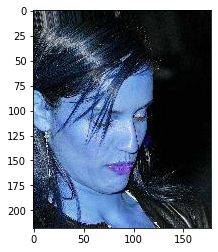

In [181]:
plt.imshow(image)

In [182]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [183]:
image.shape

(218, 178, 3)

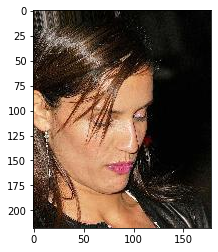

In [184]:
plt.imshow(image)

In [185]:
image1=cv2.imread('Desktop/gender/Dataset/Train/Male/160002.jpg')

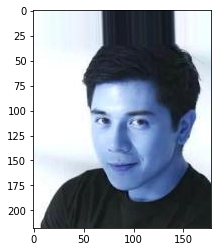

In [186]:
plt.imshow(image1)

In [187]:
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)


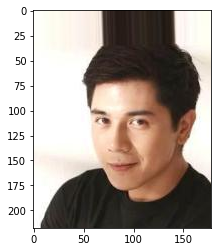

In [188]:
plt.imshow(image1)

In [189]:
image1.shape

(218, 178, 3)

In [190]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [191]:
image_gen=ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,rescale=1./255)

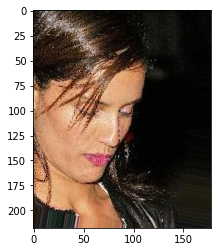

In [192]:
plt.imshow(image_gen.random_transform(image))

In [193]:
test=image_gen.flow_from_directory('Desktop/gender/Dataset/Test')
train=image_gen.flow_from_directory('Desktop/gender/Dataset/Train')

Found 20001 images belonging to 2 classes.
Found 27288 images belonging to 2 classes.


In [194]:
test.class_indices

{'Female': 0, 'Male': 1}

# Model

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Activation,Dense

In [196]:
model=Sequential()

In [197]:
shape=(150,150,3)

In [198]:
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model

In [199]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Model Summary

In [200]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)            

In [201]:
train=image_gen.flow_from_directory('Desktop/gender/Dataset/Train',target_size=(150,150),batch_size=32,class_mode='binary')
test=image_gen.flow_from_directory('Desktop/gender/Dataset/Test',target_size=(150,150),batch_size=32,class_mode='binary')


Found 27288 images belonging to 2 classes.
Found 20001 images belonging to 2 classes.


# Fitting the model

In [202]:
model.fit(train,epochs=10,steps_per_epoch=50,validation_data=test,validation_steps=12)

Epoch 1/10
50/50 [==============================] - 119s 2s/step - loss: 0.6355 - accuracy: 0.6888 - val_loss: 0.6813 - val_accuracy: 0.5990
Epoch 2/10
50/50 [==============================] - 117s 2s/step - loss: 0.5689 - accuracy: 0.7085 - val_loss: 0.6107 - val_accuracy: 0.6328
Epoch 3/10
50/50 [==============================] - 116s 2s/step - loss: 0.5197 - accuracy: 0.7362 - val_loss: 0.5258 - val_accuracy: 0.7240
Epoch 4/10
50/50 [==============================] - 115s 2s/step - loss: 0.4954 - accuracy: 0.7556 - val_loss: 0.6377 - val_accuracy: 0.6380
Epoch 5/10
50/50 [==============================] - 117s 2s/step - loss: 0.5006 - accuracy: 0.7581 - val_loss: 0.5789 - val_accuracy: 0.6823
Epoch 6/10
50/50 [==============================] - 124s 2s/step - loss: 0.5049 - accuracy: 0.7569 - val_loss: 0.4974 - val_accuracy: 0.7682
Epoch 7/10
50/50 [==============================] - 119s 2s/step - loss: 0.5078 - accuracy: 0.7644 - val_loss: 0.5560 - val_accuracy: 0.7135
Epoch 8/10
50

In [212]:
from tensorflow.keras.preprocessing import image 
import numpy as np

In [220]:
female=image.load_img(('Desktop/gender/Dataset/Train/Female/000004.jpg'),target_size=(150,150))
female=image.img_to_array(female)
female.shape

(150, 150, 3)

In [221]:
female=np.expand_dims(female,axis=0)
female.shape

(1, 150, 150, 3)

In [222]:
prediction=model.predict(female)

In [225]:
class1=model.predict_classes(female)
print(class1)

[[0]]


In [ ]:
#Accurate class label predicted by model

# Notebook by: Aimen Javed, https://github.com/AimenJaved